# Задача проекта:
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Провесте разведывательный анализ данных и составить отчёт по его результатам, чтобы определиться с параметрами будущей модели.

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [130]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [131]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## Первичная обработка данных

Построим график пропусков датафрейма, из которого будет видно колличество незаполненных значений в столбцах таблицы.

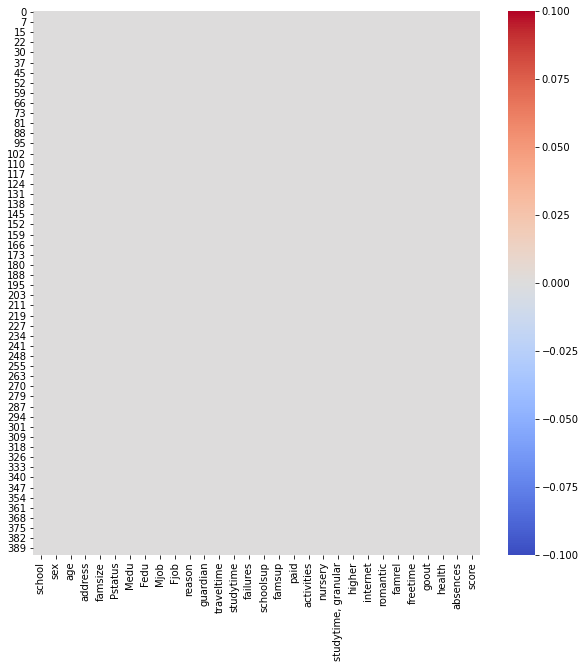

In [175]:
# график пропусков датафрейма
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(stud_math.isnull(), cmap='coolwarm', ax=ax)

### Создание функций для обработки и корректировки числовых и нечисловых значений таблицы. 

Пропуски в числовых переменных будут заменяться на значение медианы, т.к. по сравнению со средним значением, оно меньше подвержено влиянию выбросов.
Пропуски в номинативных переменных будут заполняться наиболее популярным значением столбца.

In [133]:
# функция замены нулевого значения числовых переменных на медиану
def change_none(column):
    stud_math[column] = stud_math[column].apply(
        lambda x: stud_math[column].median() if pd.isna(x) == True else x)

In [134]:
columns_list = stud_math.select_dtypes(
    include='number').columns  # перечень числовых столбцов
for column in columns_list:
    change_none(column)

In [135]:
# функция замены нулевого значения номинативных переменных на самую популярную
def fix_none(column):
    stud_math[column] = stud_math[column].apply(
        lambda x: stud_math[column].value_counts().index[0] if pd.isna(x) == True else x)

In [136]:
columns_list_nom = stud_math.select_dtypes(
    exclude='number').columns  # перечень нечисловых столбцов
for column in columns_list_nom:
    fix_none(column)

## Посмотрим на распределение признака для числовых переменных, устраним выбросы

In [137]:
# функция для проверки на выбросы
def outliers(column):
    perc25 = stud_math[column].quantile(0.25)  # нижний квартиль
    perc75 = stud_math[column].quantile(0.75)  # верхний квартиль
    IQR = perc75 - perc25  # межквартильный размех
    return ('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),
            "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

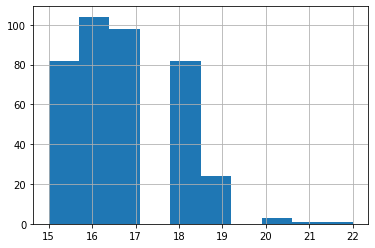

In [138]:
stud_math.age.hist()  # распределение возрастов
stud_math.age.describe()

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

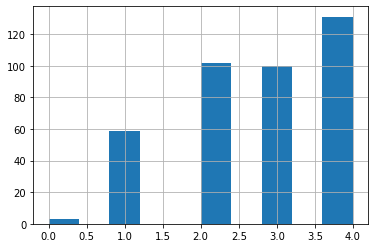

In [139]:
# образование матери (0 - нет, 1-4 класса, 2-5 - 9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
stud_math.Medu.hist()
stud_math.Medu.describe()

Проверка всех вышеперечисленных признаков показала отсутствие выбросов.

count    395.000000
mean       2.577215
std        2.164782
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

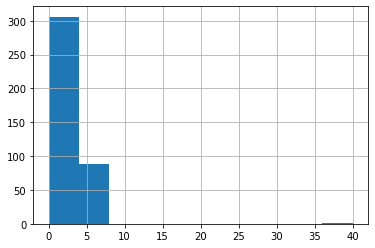

In [140]:
stud_math.Fedu.hist()  # образование отца (от 0 до 4)
stud_math.Fedu.describe()

In [141]:
stud_math[stud_math['Fedu'] > 4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,T,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Проверка признака Fedu показала выброс (Fedu = 40). Значение больше 4 считается выбросом, т.к. согласно исходным данным в данном столбце могут находиться только значения от 0 до 4. Этот выброс надо удалить, т.к. мы не знаем характер ошибки.

In [142]:
# Отфильтруем данные
stud_math = stud_math[stud_math.Fedu <= 4]

count    394.000000
mean       1.403553
std        0.674575
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

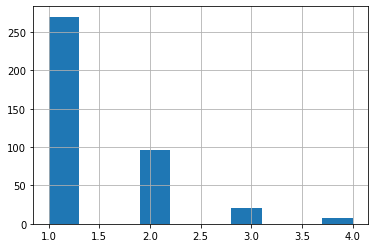

In [143]:
# время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
stud_math.traveltime.hist()
stud_math.traveltime.describe()

count    394.000000
mean       2.035533
std        0.834227
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

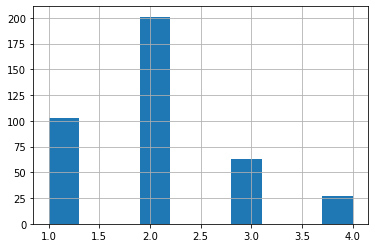

In [144]:
# время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
stud_math.studytime.hist()
stud_math.studytime.describe()

count    394.000000
mean       0.319797
std        0.726989
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

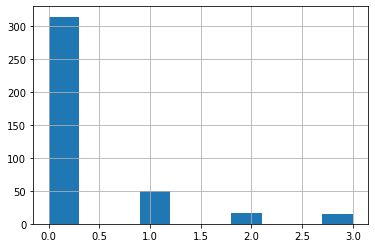

In [145]:
stud_math.failures.hist()  # количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
stud_math.failures.describe()

count    394.000000
mean      -6.106599
std        2.502682
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

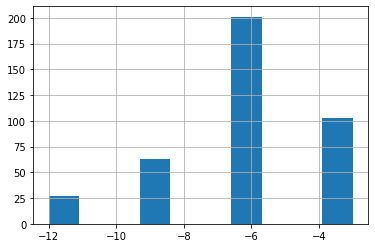

In [146]:
stud_math['studytime, granular'].hist()  # неизвестный признак
stud_math['studytime, granular'].describe()

count    394.000000
mean       3.939086
std        0.894624
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

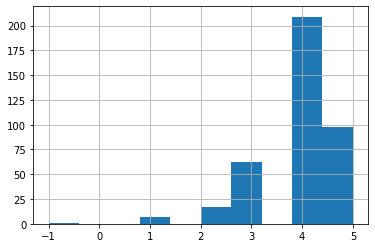

In [147]:
stud_math.famrel.hist()  # семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
stud_math.famrel.describe()

Проверка признака famrel показала выброс (famrel = -1). Значение меньше 1 считается выбросом, т.к. согласно исходным данным в данном столбце могут находиться только значения от 1 до 5. Этот выброс надо удалить, т.к. мы не знаем характер ошибки.

In [148]:
# Отфильтруем данные
stud_math = stud_math[stud_math.famrel >= 1]

count    393.000000
mean       3.231552
std        0.979286
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

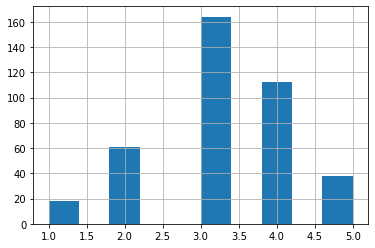

In [149]:
# свободное время после школы (от 1 - очень мало до 5 - очень мого)
stud_math.freetime.hist()
stud_math.freetime.describe()

count    393.000000
mean       3.109415
std        1.104600
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

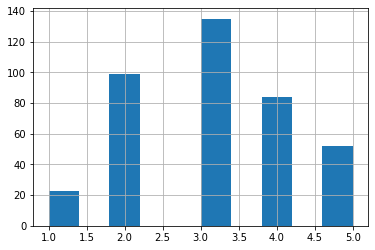

In [150]:
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
stud_math.goout.hist()
stud_math.goout.describe()

count    393.000000
mean       3.544529
std        1.373465
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

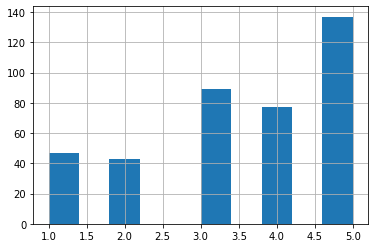

In [151]:
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
stud_math.health.hist()
stud_math.health.describe()

count    393.000000
mean       7.170483
std       23.167732
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

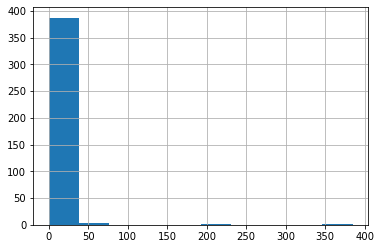

In [152]:
stud_math.absences.hist()  # количество пропущенных занятий
stud_math.absences.describe()

Проверка признака absences показала выброс (max = 385). Количество пропущенных занятий основной массы учеников колеблется от 0 до 50, так что значение 385 будем считать выбросом. Проверим значение межквартильного размаха и посчитаем значения выбросов.

In [153]:
outliers('absences')  # смотрим значения квартилей и межквартильного размаха

('25-й перцентиль: 0.0,',
 '75-й перцентиль: 8.0,',
 'IQR: 8.0, ',
 'Границы выбросов: [-12.0, 20.0].')

In [154]:
# Отфильтруем выбросы
perc25 = stud_math.absences.quantile(0.25)  # нижний квартиль
perc75 = stud_math.absences.quantile(0.75)  # верхний квартиль
IQR = perc75 - perc25  # межквартильный размех
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    376.000000
mean      52.287234
std       22.939513
min        0.000000
25%       43.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

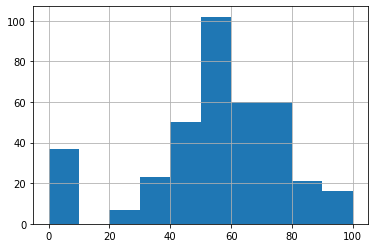

In [155]:
stud_math.score.hist()  # баллы по госэкзамену по математике
stud_math.score.describe()

## Оценка количества уникальных значений для номинативных переменных.

In [156]:
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [157]:
stud_math.school.value_counts()  # аббревиатура школы, в которой учится ученик

GP    331
MS     45
Name: school, dtype: int64

In [158]:
stud_math.sex.value_counts()  # пол ученика ('F' - женский, 'M' - мужской)

F    193
M    183
Name: sex, dtype: int64

In [159]:
# тип адреса ученика ('U' - городской, 'R' - за городом)
stud_math.address.value_counts()

U    295
R     81
Name: address, dtype: int64

In [160]:
stud_math.famsize.value_counts()  # размер семьи('LE3' <= 3, 'GT3' >3)

GT3    272
LE3    104
Name: famsize, dtype: int64

In [161]:
# работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
display(pd.DataFrame(stud_math.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 50 раз:",
      (stud_math.Mjob.value_counts() > 50).sum())
print("Уникальных значений:", stud_math.Mjob.nunique())
stud_math.loc[:, ['Mjob']].info()

,Mjob
other,144
services,89
at_home,57
teacher,54
health,32


Значений, встретившихся в столбце более 50 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [162]:
# работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
display(pd.DataFrame(stud_math.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 50 раз:",
      (stud_math.Fjob.value_counts() > 50).sum())
print("Уникальных значений:", stud_math.Fjob.nunique())
stud_math.loc[:, ['Fjob']].info()

,Fjob
other,224
services,94
teacher,27
at_home,16
health,15


Значений, встретившихся в столбце более 50 раз: 2
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    376 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [163]:
# причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
display(pd.DataFrame(stud_math.reason.value_counts()))
print("Значений, встретившихся в столбце более 50 раз:",
      (stud_math.reason.value_counts() > 50).sum())
print("Уникальных значений:", stud_math.reason.nunique())
stud_math.loc[:, ['reason']].info()

,reason
course,152
reputation,97
home,94
other,33


Значений, встретившихся в столбце более 50 раз: 3
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  376 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [164]:
# опекун ('mother' - мать, 'father' - отец, 'other' - другое)
stud_math.guardian.value_counts()

mother    267
father     84
other      25
Name: guardian, dtype: int64

In [165]:
# дополнительная образовательная поддержка (yes или no)
stud_math.schoolsup.value_counts()

no     328
yes     48
Name: schoolsup, dtype: int64

In [166]:
stud_math.famsup.value_counts()  # семейная образовательная поддержка (yes или no)

yes    243
no     133
Name: famsup, dtype: int64

## Проведите корреляционный анализ количественных переменных
Рассмотрим степень связи между количественными признаками нашей таблицы. 
Коэффициент корреляции может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками. 

In [167]:
# коэффициенты корреляции между количественными признаками сохраним в новом датафрейме correlation.
correlation = stud_math.corr()

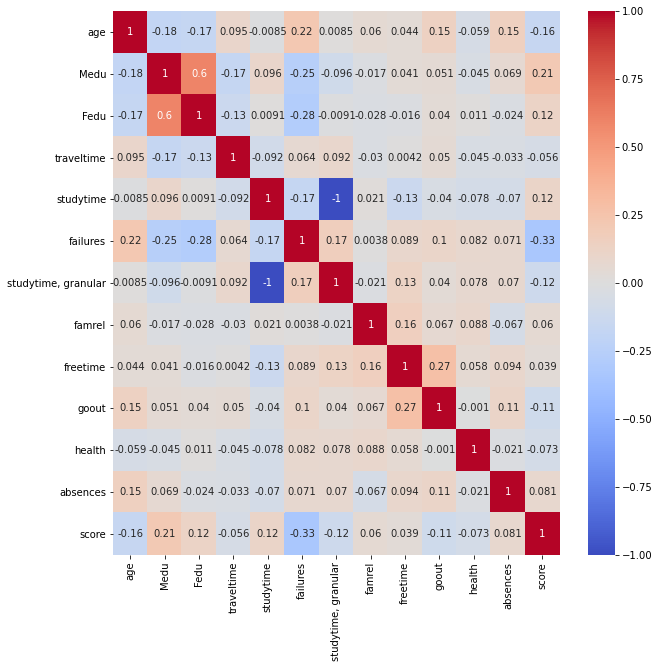

In [168]:
# построим тепловую карту значений коэффициентов корреляции
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax)

Неописанная в исходных данных переменная studytime, granular, более всего зависит от свободного времени после школы, количество внеучебных неудач, времени в пути до школы и состояния здоровья учащегося. Так же переменная имеет отрицательные значения, из чего можно предположить, что это задолженность учащегося по выполненным заданиям. Данная переменная не оказывает особого влияния на итоговый балл по математике.

In [169]:
# Используем для наглядности матрицу корреляций:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.182506,-0.169810,0.095131,-0.008483,0.221297,0.008483,0.060337,0.043582,0.145308,-0.059196,0.151881,-0.158053
Medu,-0.182506,1.000000,0.598327,-0.170914,0.095979,-0.253135,-0.095979,-0.017390,0.041361,0.050665,-0.044971,0.068651,0.212353
Fedu,-0.169810,0.598327,1.000000,-0.132565,0.009131,-0.277640,-0.009131,-0.027580,-0.015852,0.039550,0.010564,-0.023612,0.118362
traveltime,0.095131,-0.170914,-0.132565,1.000000,-0.092025,0.063948,0.092025,-0.029791,0.004231,0.050271,-0.045026,-0.032675,-0.056322
studytime,-0.008483,0.095979,0.009131,-0.092025,1.000000,-0.167298,-1.000000,0.020988,-0.132306,-0.040009,-0.077660,-0.070455,0.116735
failures,0.221297,-0.253135,-0.277640,0.063948,-0.167298,1.000000,0.167298,0.003821,0.089126,0.104564,0.082250,0.071497,-0.328654
"studytime, granular",0.008483,-0.095979,-0.009131,0.092025,-1.000000,0.167298,1.000000,-0.020988,0.132306,0.040009,0.077660,0.070455,-0.116735
famrel,0.060337,-0.017390,-0.027580,-0.029791,0.020988,0.003821,-0.020988,1.000000,0.160327,0.066849,0.088114,-0.067188,0.060154
freetime,0.043582,0.041361,-0.015852,0.004231,-0.132306,0.089126,0.132306,0.160327,1.000000,0.274073,0.057691,0.093735,0.038884
goout,0.145308,0.050665,0.039550,0.050271,-0.040009,0.104564,0.040009,0.066849,0.274073,1.000000,-0.001010,0.111644,-0.109016


Переменные с максимальным коэффициентом корреляции для score являются Medu, Fedu, studytime, absences.
Переменные с отрицательным коэффициентом корреляции имеют слабую связь с предсказываемым признаком.

##  Анализ номинативных переменных
Устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

Посмотрим, различаются ли распределения баллов в зависимости от значения этих переменных с помощью графика box-plot.Так как уникальных значений в столбцах немного, будем брать все значения. 

In [170]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

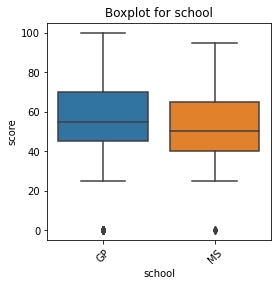

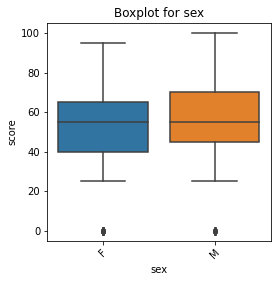

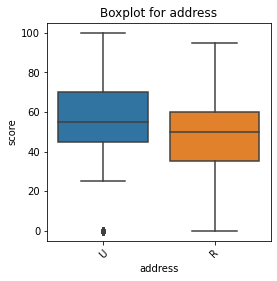

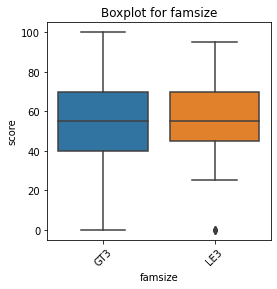

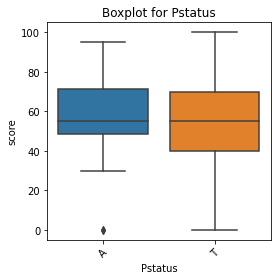

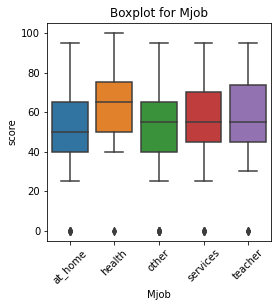

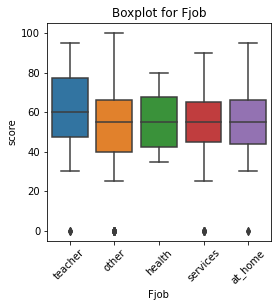

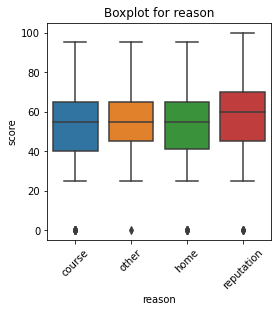

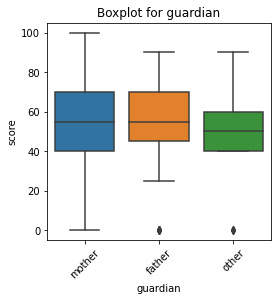

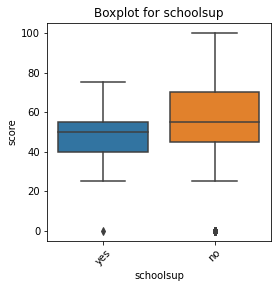

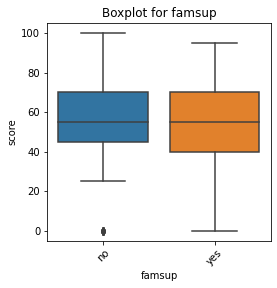

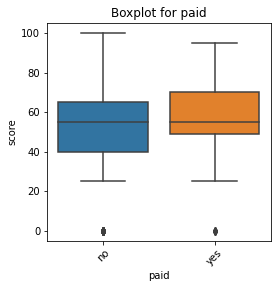

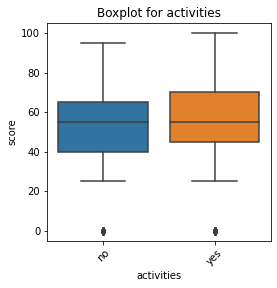

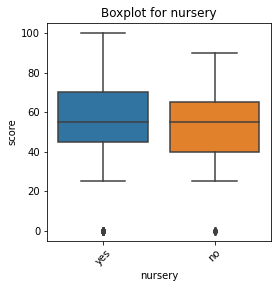

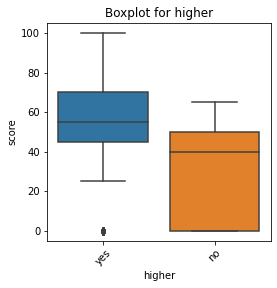

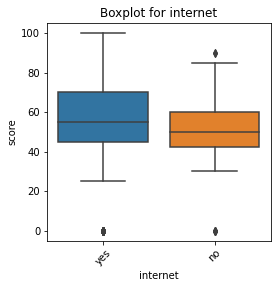

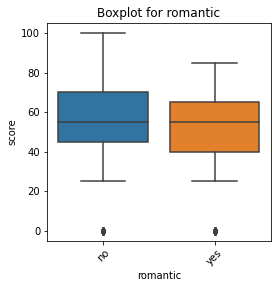

In [171]:
columns_list_nom = stud_math.select_dtypes(
    exclude='number').columns  # перечень нечисловых столбцов
for column in columns_list_nom:
    get_boxplot(column)

По графику видно, что все параметры оказывают влияние на итоговый балл по математике. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы.

In [172]:
def get_stat_dif(column):  # теста Стьюдента
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [173]:
columns_list_nom = stud_math.select_dtypes(
    exclude='number').columns  # перечень нечисловых столбцов
for column in columns_list_nom:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, статистически значимые различия нашлись у параметров: sex, address, Mjob, paid, higher, romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: Medu, Fedu, studytime, absences, famrel, freetime, sex, address, Mjob, paid, higher, romantic.

In [174]:
stud_math_model = stud_math.loc[:, ['Medu', 'Fedu', 'studytime', 'absences',
                                    'sex', 'address', 'Mjob', 'paid', 'higher', 'romantic']]
stud_math_model.head()

,Medu,Fedu,studytime,absences,sex,address,Mjob,paid,higher,romantic
0,4.0,4.0,2.0,6.0,F,U,at_home,no,yes,no
1,1.0,1.0,2.0,4.0,F,U,at_home,no,yes,no
2,1.0,1.0,2.0,10.0,F,U,at_home,no,yes,no
3,4.0,2.0,3.0,2.0,F,U,health,yes,yes,yes
4,3.0,3.0,2.0,4.0,F,U,other,yes,yes,no


Выводы:
- В данных достаточно много пустых значений. Только три первых столбца: scool, sex, age были заполнены полностью.
- Выбросы числовых переменных найдены только в столбцах fedu, famrel и absences. Количество выбросов по соотношением с количеством данных можно считать незначительным. Это позволяет сделать вывод о том, что данные достаточно чистые.
- Неизвестная переменная studytime, granular согласно телповой таблице не оказывает особого влияния на итоговый балл по математике и, предположительно, может означать количество пропусков занятий или задолженность учащегося по выполненным заданиям.
- Анализ номинативных переменных показал, что они все в большей или меньшей мере оказывают влияние на итоговый балл по математике, но пол ученика, местро проживания, работа матери, дополнительный платные занятия по математике, желание получить образование и романтические отношения оказывают наибольшее влияние про сравнению с остальными признаками.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это cMedu, Fedu, studytime, absences, sex, address, Mjob, paid, higher, romantic.